# MultiIndexes
## AKA Heirarchical Indexes

In [1]:
import pandas as pd
carstocks = pd.read_csv("data/car_stocks.csv")
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic['age'] = titanic["age"].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic["fare"].replace(['?'], [None]).astype('float')

## Grouping By Multiple Columns!

In [3]:
df = titanic.groupby(['pclass','sex'])['age'].mean()

In [4]:
df

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

In [5]:
df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [6]:
titanic.groupby(['pclass','sex']).mean()

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [7]:
pops = pd.read_csv("data/state_pops.csv")

In [8]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1272 non-null   object 
 1   year        1272 non-null   int64  
 2   population  1262 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.9+ KB


In [9]:
pops.head()

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0


In [10]:
pops.set_index(['state','year'],inplace=True) #we can have more than 2 indexs

In [11]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [12]:
titanic.sort_index(ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3,0,"Zimmerman, Mr. Leo",male,29.0000,0,0,315082,7.8750,?,S,?,?,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"


In [13]:
#sorting index
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [14]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

<AxesSubplot:xlabel='year'>

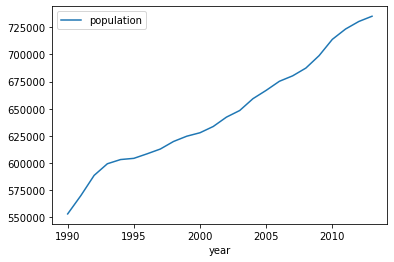

In [15]:
pops.loc['AK'].sort_index().plot(kind='line')

<Figure size 720x720 with 0 Axes>

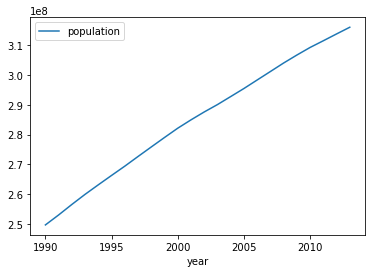

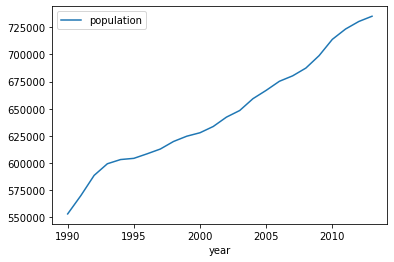

<Figure size 720x720 with 0 Axes>

In [16]:

pops.loc['USA'].sort_index().plot(kind='line')
pops.loc['AK'].sort_index().plot(kind='line')
plt.figure(figsize=(10,10))

In [17]:
pops.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [18]:
pops.sort_index(ascending=[False,True],level=[0,1])

population
state year            
WY    1990    453690.0
      1991    459260.0
      1992    466251.0
      1993    473081.0
      1994    480283.0
...                ...
AK    2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

[1272 rows x 1 columns]

In [19]:
pops.sort_index(inplace=True)

In [20]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [21]:
pops.loc['AK']

,population
year,
1990,553290.0
1991,570193.0
1992,588736.0
1993,599434.0
1994,603308.0
1995,604412.0
1996,608569.0
1997,612968.0
1998,619933.0


In [22]:
pops.loc['AK',1990] - pops.loc['AK',2013]

population   -181842.0
dtype: float64

In [23]:
pops.loc[['AK','CA']]

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
      1996    608569.0
      1997    612968.0
      1998    619933.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
      1995  31696582.0
      1996  32018834.0
      1997  32486010.0
      1998  32987675.0
      1999  33499204.0
      2000  33987977.0
      2001  34479458.0
      2002  34871843.0
      2003  35253159.0
      2004  35574576.0
      2005  35827943.0
      2006  36021202.0
      2007  36250311.0
      2008  36604337.0
      2009  36961229.0
      2010  37333601.0
      2011  37668681.0
      2012  37999878.0
      2013  38332521.0

In [24]:
pops.loc["NM":"TX"]

population
state year            
NM    1990   1521574.0
      1991   1555305.0
      1992   1595442.0
      1993   1636453.0
      1994   1682398.0
...                ...
TX    2009  24801761.0
      2010  25245178.0
      2011  25640909.0
      2012  26060796.0
      2013  26448193.0

[312 rows x 1 columns]

In [25]:
pops.loc['MT',1992]

population    825770.0
Name: (MT, 1992), dtype: float64

In [26]:
pops.loc[('MT',1992)]

population    825770.0
Name: (MT, 1992), dtype: float64

In [27]:
pops.loc[("CA",2013)]

population    38332521.0
Name: (CA, 2013), dtype: float64

In [28]:
pops.loc[("AK",1990):("AK",1995)]

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0

In [29]:
pops.loc[:, 1990, :]

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
CO,1990,3307618.0
CT,1990,3291967.0
DC,1990,605321.0
DE,1990,669567.0


In [30]:
pops.loc[:, [1990,1991], :]

population
state year            
AK    1990    553290.0
      1991    570193.0
AL    1990   4050055.0
      1991   4099156.0
AR    1990   2356586.0
...                ...
WI    1991   4964343.0
WV    1990   1792548.0
      1991   1798735.0
WY    1990    453690.0
      1991    459260.0

[106 rows x 1 columns]

In [31]:
pops.loc[:,2013,:]

,,population
state,year,
AK,2013,735132.0
AL,2013,4833722.0
AR,2013,2959373.0
AZ,2013,6626624.0
CA,2013,38332521.0
CO,2013,5268367.0
CT,2013,3596080.0
DC,2013,646449.0
DE,2013,925749.0


## The xs method

In [32]:
pops.xs(2013,level='year')

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [33]:
pops.xs('AK',level=0)

,population
year,
1990,553290.0
1991,570193.0
1992,588736.0
1993,599434.0
1994,603308.0
1995,604412.0
1996,608569.0
1997,612968.0
1998,619933.0


In [34]:
#get_level_values()

In [36]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [39]:
pops.index.get_level_values(0)

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='state', length=1272)

In [40]:
pops.index.get_level_values(1)

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name='year', length=1272)

In [41]:
pops.loc[:, [1990,1992,1995], :]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1995    604412.0
AL    1990   4050055.0
      1992   4154014.0
...                ...
WV    1992   1806451.0
      1995   1823700.0
WY    1990    453690.0
      1992    466251.0
      1995    485160.0

[159 rows x 1 columns]

In [43]:
even_years = pops.index.get_level_values(1) % 2 == 0

In [44]:
even_years

array([ True, False,  True, ..., False,  True, False])

In [45]:
pops[even_years]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1996    608569.0
      1998    619933.0
...                ...
WY    2004    509106.0
      2006    522667.0
      2008    546043.0
      2010    564222.0
      2012    576626.0

[636 rows x 1 columns]

In [49]:
even_pops = pops['population'] % 2 == 0

In [50]:
pops[even_years & even_pops]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      2004    659286.0
      2006    675302.0
...                ...
WY    1990    453690.0
      2000    494300.0
      2004    509106.0
      2010    564222.0
      2012    576626.0

[304 rows x 1 columns]

In [51]:
ends_with_a = pops.index.get_level_values(0).str[1] == 'A'

In [52]:
pops[ends_with_a]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
...                ...
WA    2009   6667426.0
      2010   6742256.0
      2011   6821481.0
      2012   6895318.0
      2013   6971406.0

[192 rows x 1 columns]

# Heirarchical Columns!

In [53]:
df = titanic.groupby(['pclass','sex']).mean()

In [57]:
df.loc[(2,'male')]

survived     0.146199
age         30.815401
sibsp        0.327485
parch        0.192982
fare        19.904946
Name: (2, male), dtype: float64

In [59]:
df1 = titanic.groupby('sex').agg({'age':['min','max','mean'],
                           'fare': ['min','max','mean'],
                           'survived':['mean']})

In [60]:
df1.index

Index(['female', 'male'], dtype='object', name='sex')

In [61]:
df1.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [64]:
df1[('age','mean')]

sex
female    28.687071
male      30.585233
Name: (age, mean), dtype: float64

In [66]:
df1['age']['mean']

sex
female    28.687071
male      30.585233
Name: mean, dtype: float64

In [68]:
df1["fare"]['max']

sex
female    512.3292
male      512.3292
Name: max, dtype: float64

In [69]:
df1[('fare','max')]

sex
female    512.3292
male      512.3292
Name: (fare, max), dtype: float64

# Stack( ) and Unstack( )

In [70]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [72]:
pops.unstack()

population                                                      \
year          1990         1991         1992         1993         1994   
state                                                                    
AK        553290.0     570193.0     588736.0     599434.0     603308.0   
AL       4050055.0    4099156.0    4154014.0    4214202.0    4260229.0   
AR       2356586.0    2383144.0    2415984.0    2456303.0    2494019.0   
AZ       3684097.0    3788576.0    3915740.0    4065440.0    4245089.0   
CA      29959515.0   30470736.0   30974659.0   31274928.0   31484435.0   
CO       3307618.0    3387119.0    3495939.0    3613734.0    3724168.0   
CT       3291967.0    3302895.0    3300712.0    3309175.0    3316121.0   
DC        605321.0     600870.0     597567.0     595302.0     589240.0   
DE        669567.0     683080.0     694927.0     706378.0     717545.0   
FL      13033307.0   13369798.0   13650553.0   13927185.0   14239444.0   
GA       6512602.0    6653005.0    6817203.0    6978240.0    7157165.0   
HI       1113491.0    1136754.0    1158613.0    1172838.0    1187536.0   
IA       2781018.0    2797613.0    2818401.0    2836972.0    2850746.0   
ID       1012384.0    1041316.0    1071685.0    1108768.0    1145140.0   
IL      11453316.0   11568964.0   11694184.0   11809579.0   11912585.0   
IN       5557798.0    5616388.0    5674547.0    5739019.0    5793526.0   
KS       2481349.0    2498722.0    2532395.0    2556547.0    2580513.0   
KY       3694048.0    3722328.0    3765469.0    3812206.0    3849088.0   
LA       4221532.0    4253279.0    4293003.0    4316428.0    4347481.0   
MA       6022639.0    6018470.0    6028709.0    6060569.0    6095241.0   
MD       4799770.0    4867641.0    4923369.0    4971889.0    5023060.0   
ME       1231719.0    1237081.0    1238508.0    1242302.0    1242662.0   
MI       9311319.0    9400446.0    9479065.0    9540114.0    9597737.0   
MN       4389857.0    4440859.0    4495572.0    4555956.0    4610355.0   
MO       5128880.0    5170800.0    5217101.0    5271175.0    5324497.0   
MS       2578897.0    2598733.0    2623734.0    2655100.0    2688992.0   
MT        800204.0     809680.0     825770.0     844761.0     861306.0   
NC       6664016.0    6784280.0    6897214.0    7042818.0    7187398.0   
ND        637685.0     635753.0     638223.0     641216.0     644806.0   
NE       1581660.0    1595919.0    1611687.0    1625590.0    1639041.0   
NH       1112384.0    1109929.0    1117785.0    1129458.0    1142561.0   
NJ       7762963.0    7814676.0    7880508.0    7948915.0    8014306.0   
NM       1521574.0    1555305.0    1595442.0    1636453.0    1682398.0   
NV       1220695.0    1296172.0    1351367.0    1411215.0    1499298.0   
NY      18020784.0   18122510.0   18246653.0   18374954.0   18459470.0   
OH      10864162.0   10945762.0   11029431.0   11101140.0   11152455.0   
OK       3148825.0    3175440.0    3220517.0    3252285.0    3280940.0   
OR       2860375.0    2928507.0    2991755.0    3060367.0    3121264.0   
PA      11903299.0   11982164.0   12049450.0   12119724.0   12166050.0   
PR             NaN          NaN          NaN          NaN          NaN   
RI       1005995.0    1010649.0    1012581.0    1015113.0    1015960.0   
SC       3501155.0    3570404.0    3620464.0    3663314.0    3705397.0   
SD        697101.0     703669.0     712801.0     722160.0     730790.0   
TN       4894492.0    4966587.0    5049742.0    5137584.0    5231438.0   
TX      17056755.0   17398005.0   17759738.0   18161612.0   18564062.0   
USA    249622814.0  252980942.0  256514231.0  259918595.0  263125826.0   
UT       1731223.0    1779780.0    1836799.0    1898404.0    1960446.0   
VA       6216884.0    6301217.0    6414307.0    6509630.0    6593139.0   
VT        564798.0     568606.0     572751.0     577748.0     583836.0   
WA       4903043.0    5025624.0    5160757.0    5278842.0    5375161.0   
WI       4904562.0    4964343.0    5025398.0    5084889.0    5133678.0   
WV       179

In [75]:
unstacked_df = pops.unstack('state')

In [76]:
unstacked_df.stack()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1262 rows x 1 columns]

In [79]:
titanic.groupby(['pclass','sex'])['age'].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

<AxesSubplot:xlabel='pclass,sex'>

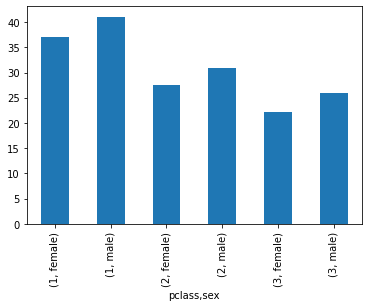

In [80]:
titanic.groupby(['pclass','sex'])['age'].mean().plot(kind='bar')

In [81]:
titanic.groupby(['pclass','sex'])['age'].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


<AxesSubplot:xlabel='pclass'>

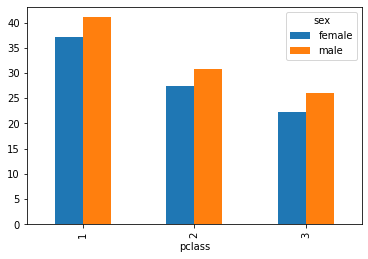

In [83]:
titanic.groupby(['pclass','sex'])['age'].mean().unstack().plot(kind='bar')

In [84]:
titanic.groupby(['pclass','sex'])['age'].mean().unstack(level='pclass')

pclass,1,2,3
sex,,,
female,37.037594,27.499191,22.185307
male,41.029250,30.815401,25.962273


<AxesSubplot:xlabel='sex'>

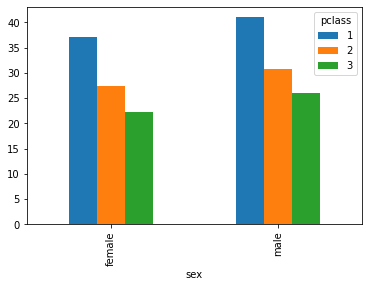

In [85]:
titanic.groupby(['pclass','sex'])['age'].mean().unstack(level='pclass').plot(kind='bar')

<AxesSubplot:xlabel='sex'>

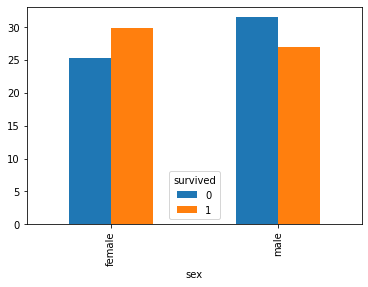

In [86]:
titanic.groupby(['sex','survived'])['age'].mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

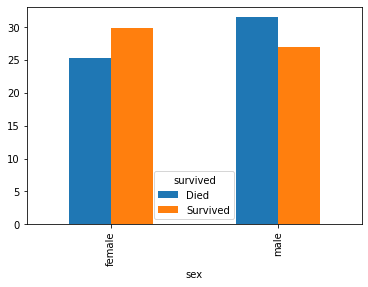

In [88]:
titanic.groupby(['sex','survived'])['age'].mean().unstack().rename(columns={0:'Died',1:'Survived'}).plot(kind='bar')

In [92]:
pops.groupby(level=1).sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0


<AxesSubplot:xlabel='year'>

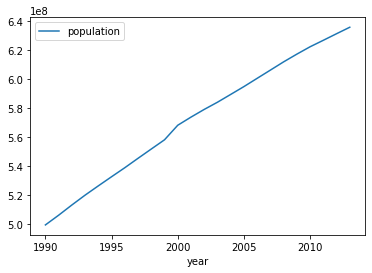

In [93]:
pops.groupby(level=1).sum().plot(kind='line')

In [94]:
pops.groupby(level=0).min()

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DC,565232.0
DE,669567.0


In [97]:
pops.groupby('year').min()

,population
year,
1990,453690.0
1991,459260.0
1992,466251.0
1993,473081.0
1994,480283.0
1995,485160.0
1996,488167.0
1997,489452.0
1998,490787.0


In [98]:
pops.groupby(['year','state']).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]